In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_pickle('all_trips.pkl')

C:\Users\Presian Petrov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


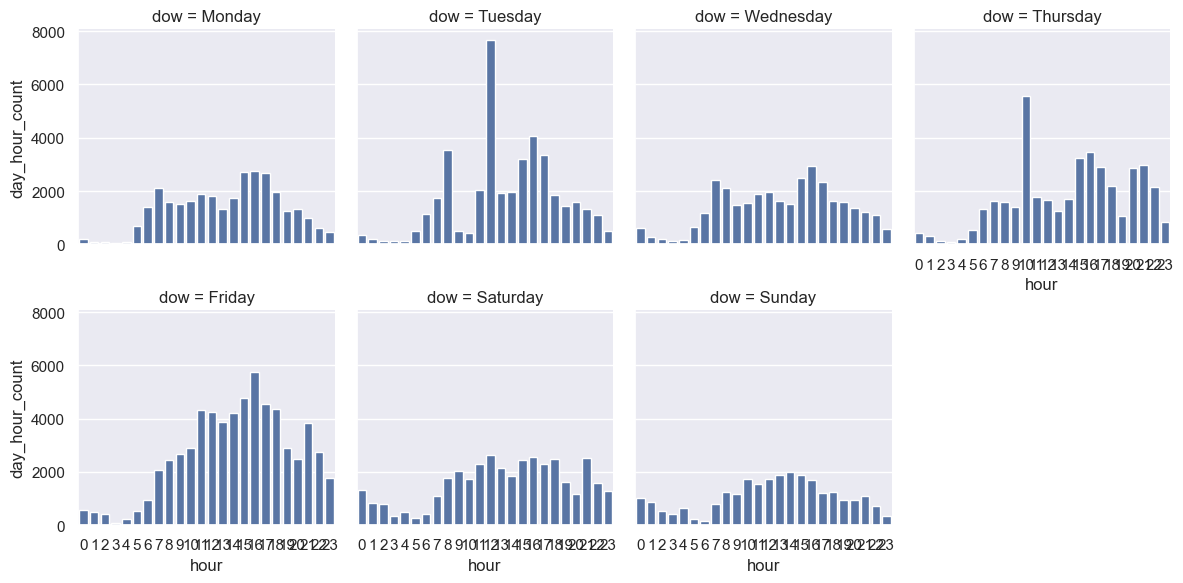

In [4]:
df['dow'] = df.trip_start_time.dt.day_name()
df['hour'] = df.trip_start_time.dt.hour
ax  = sns.FacetGrid(data=df.groupby([
    'dow',
    'hour'
]).hour.count().to_frame(name='day_hour_count').reset_index(), col='dow', col_order=[
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap=4)
ax.map(sns.barplot, 'hour', 'day_hour_count');

In [5]:
daily = df.set_index('trip_start_time').groupby(pd.Grouper(freq='D')).size()
daily = pd.DataFrame(daily)
daily = daily.reset_index()
daily.columns = ['ds', 'y']
daily

,ds,y
0,2024-02-20,18726
1,2024-02-21,25549
2,2024-02-22,25849
3,2024-02-23,24684
4,2024-02-24,18907
5,2024-02-25,13907
6,2024-02-26,17171
7,2024-02-27,10571
8,2024-02-28,0
9,2024-02-29,4272


In [6]:
m = Prophet()
m.fit(daily)

17:12:59 - cmdstanpy - INFO - Chain [1] start processing
17:13:00 - cmdstanpy - INFO - Chain [1] done processing


In [7]:

future = m.make_future_dataframe(periods=5)
future

,ds
0,2024-02-20
1,2024-02-21
2,2024-02-22
3,2024-02-23
4,2024-02-24
5,2024-02-25
6,2024-02-26
7,2024-02-27
8,2024-02-28
9,2024-02-29


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
25,2024-03-16,-1019.632202,-6929.602641,5241.857808
26,2024-03-17,-5017.778303,-10825.339887,888.860904
27,2024-03-18,-3311.954905,-8943.693102,2832.913437
28,2024-03-19,-6873.345985,-12878.010651,-606.273905
29,2024-03-20,-8838.194634,-14817.632381,-2865.223490


C:\Users\Presian Petrov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Presian Petrov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


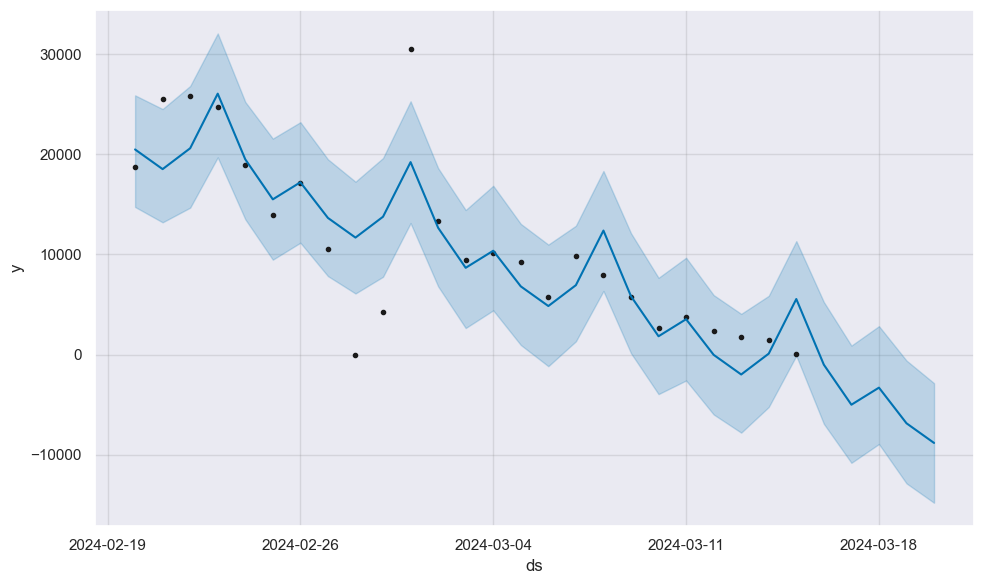

In [9]:
fig1 = m.plot(forecast)

In [10]:
hourly = df.set_index('trip_start_time').groupby(pd.Grouper(freq='2h')).size()
hourly = pd.DataFrame(hourly)
hourly = hourly.reset_index()
hourly.columns = ['ds', 'y']
hourly.head()

,ds,y
0,2024-02-20 10:00:00,1372
1,2024-02-20 12:00:00,2831
2,2024-02-20 14:00:00,3561
3,2024-02-20 16:00:00,5256
4,2024-02-20 18:00:00,2486


In [11]:
mh = Prophet()
mh.fit(hourly)

17:15:33 - cmdstanpy - INFO - Chain [1] start processing
17:15:33 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
futureh = mh.make_future_dataframe(periods=12)
futureh

,ds
0,2024-02-20 10:00:00
1,2024-02-20 12:00:00
2,2024-02-20 14:00:00
3,2024-02-20 16:00:00
4,2024-02-20 18:00:00
...,...
295,2024-03-23 08:00:00
296,2024-03-24 08:00:00
297,2024-03-25 08:00:00
298,2024-03-26 08:00:00


In [16]:
forecasth = mh.predict(future)
forecasth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-02-20,1538.314543,541.981521,2519.360459
1,2024-02-21,1176.638482,205.969122,2236.479950
2,2024-02-22,938.221007,-11.217920,1967.505149
3,2024-02-23,1442.758238,482.370693,2411.402443
4,2024-02-24,1601.320425,569.849997,2527.169327
5,2024-02-25,759.696729,-283.379768,1805.093576
6,2024-02-26,724.062087,-291.553245,1624.259141
7,2024-02-27,742.630818,-179.670130,1729.133009
8,2024-02-28,383.354874,-592.913372,1330.025186
9,2024-02-29,165.315554,-836.608392,1113.012038


C:\Users\Presian Petrov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Presian Petrov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


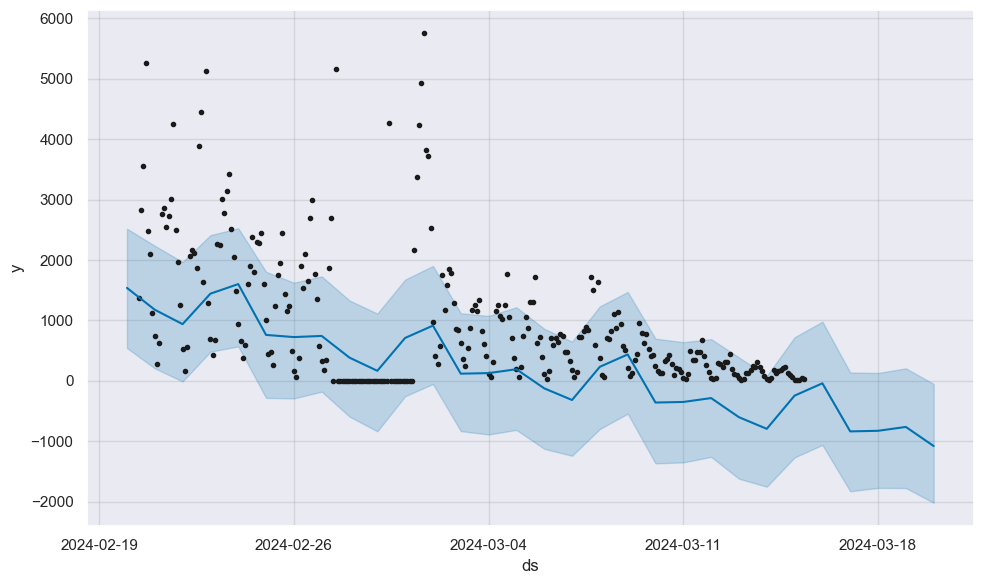

In [17]:
figh = mh.plot(forecasth)

In [18]:
forecast.to_csv('forecast.csv')
forecasth.to_csv('forecasth.csv')
forecast.to_pickle('forecast.pkl')
forecasth.to_pickle('forecasth.pkl')